In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from doppler_prn import *

plt.rcParams['text.usetex'] = True

sns.set_style("whitegrid")

In [14]:
gold_weil = pickle.load(open("results/gold_weil.pkl", "rb"))
print(gold_weil.keys())

dict_keys(['gold_31_1023_codes', 'gold_31_1023_obj', 'gold_300_1023_codes', 'gold_300_1023_obj', 'weil_31_10230_codes', 'weil_31_10230_obj'])


In [63]:
gps_results = pickle.load(open("results/gps_exact_seed=0.pkl", "rb"))
gps_results.keys()

dict_keys(['codes', 'obj', 'weights', 'final_obj_true'])

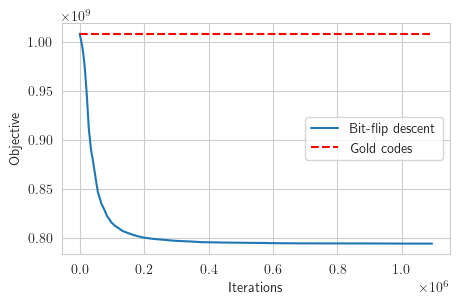

In [64]:
plt.figure(figsize=(5, 3))
sns.lineplot(gps_results["obj"], label="Bit-flip descent")
plt.hlines(gold_weil["gold_31_1023_obj"], xmin=0, xmax=len(gps_results["obj"]), linestyle="--", color="red", label="Gold codes")
plt.legend(loc="right")
plt.xlabel("Iterations")
plt.ylabel("Objective")
plt.savefig("gps_obj.pdf", bbox_inches="tight")
plt.show()

In [45]:
gpsl5_results = pickle.load(open("results/gpsl5_10_seed=0.pkl", "rb"))
gpsl5_results.keys()

dict_keys(['codes', 'obj', 'weights', 'final_obj_true'])

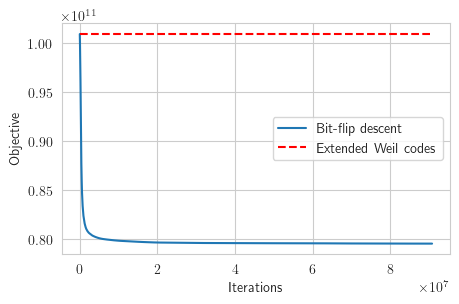

In [53]:
objs = gpsl5_results["obj"]

plt.figure(figsize=(5, 3))
sns.lineplot(x=range(len(objs))[::1000], y=objs[::1000], label="Bit-flip descent")
plt.hlines(gold_weil["weil_31_10230_obj"], xmin=0, xmax=len(gpsl5_results["obj"]), linestyle="--", color="red", label="Extended Weil codes")
plt.legend(loc="right")
plt.xlabel("Iterations")
plt.ylabel("Objective")
plt.savefig("gpsl5_obj.pdf", bbox_inches="tight")
plt.show()

In [65]:
leo_1023_results = pickle.load(open("results/leo_1023_exact_seed=0.pkl", "rb"))
leo_1023_results.keys()

dict_keys(['codes', 'obj', 'weights', 'final_obj_true'])

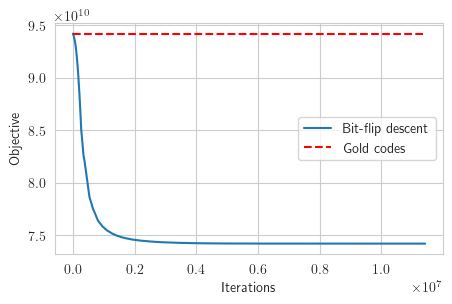

In [66]:
objs = leo_1023_results["obj"]

plt.figure(figsize=(5, 3))
sns.lineplot(objs, label="Bit-flip descent")
plt.hlines(gold_weil["gold_300_1023_obj"], xmin=0, xmax=len(objs), linestyle="--", color="red", label="Gold codes")
plt.legend(loc="right")
plt.xlabel("Iterations")
plt.ylabel("Objective")
plt.savefig("leo_1023_obj.pdf", bbox_inches="tight")
plt.show()

In [67]:
data = pickle.load(open("results/obj_v_freqs.pkl", "rb"))
gps_data = data["gps"]
gpsl5_data = data["gpsl5"]
leo1023_data = data["leo_1023"]

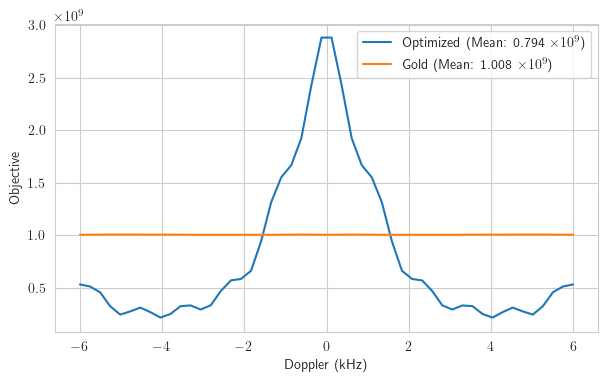

In [90]:
freqs = gps_data["freqs"]
opt = gps_data["opt"]
bench = gps_data["bench"]

m, n = gps_results["codes"].shape
opt_obj = gps_results["final_obj_true"] * 1e-9
bench_obj = gold_weil["gold_31_1023_obj"] * 1e-9

plt.figure(figsize=(7, 4))
sns.lineplot(x=freqs/1000, y=opt, label=r"Optimized (Mean: %0.3f $\times 10^9$)" % opt_obj)
sns.lineplot(x=freqs/1000, y=bench, label=r"Gold (Mean: %0.3f $\times 10^9$)" % bench_obj)
plt.xlabel("Doppler (kHz)")
plt.ylabel("Objective ")
plt.legend(loc="upper right")
plt.savefig("gps_obj_v_freqs.pdf", bbox_inches="tight")
plt.show()

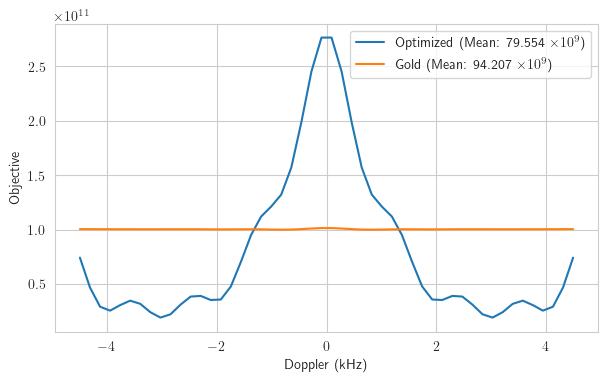

In [91]:
freqs = gpsl5_data["freqs"]
opt = gpsl5_data["opt"]
bench = gpsl5_data["bench"]

m, n = gpsl5_results["codes"].shape
opt_obj = gpsl5_results["final_obj_true"] * 1e-9
bench_obj = gold_weil["gold_300_1023_obj"] * 1e-9

plt.figure(figsize=(7, 4))
sns.lineplot(x=freqs/1000, y=opt, label=r"Optimized (Mean: %0.3f $\times 10^9$)" % opt_obj)
sns.lineplot(x=freqs/1000, y=bench, label=r"Gold (Mean: %0.3f $\times 10^9$)" % bench_obj)
plt.xlabel("Doppler (kHz)")
plt.ylabel("Objective ")
plt.legend(loc="upper right")
plt.savefig("gpsl5_obj_v_freqs.pdf", bbox_inches="tight")
plt.show()

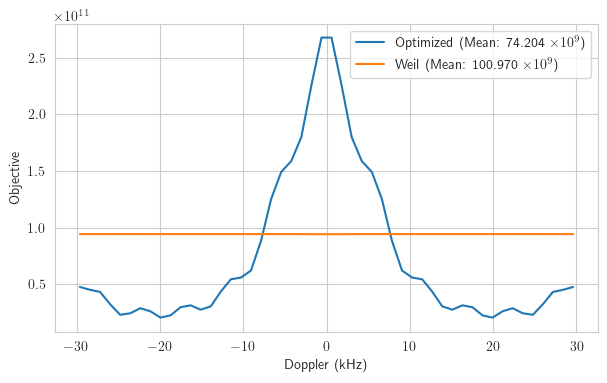

In [92]:
freqs = leo1023_data["freqs"]
opt = leo1023_data["opt"]
bench = leo1023_data["bench"]

m, n = leo_1023_results["codes"].shape
opt_obj = leo_1023_results["final_obj_true"] * 1e-9
bench_obj = gold_weil["weil_31_10230_obj"] * 1e-9

plt.figure(figsize=(7, 4))
sns.lineplot(x=freqs/1000, y=opt, label=r"Optimized (Mean: %0.3f $\times 10^9$)" % opt_obj)
sns.lineplot(x=freqs/1000, y=bench, label=r"Weil (Mean: %0.3f $\times 10^9$)" % bench_obj)
plt.xlabel("Doppler (kHz)")
plt.ylabel("Objective ")
plt.legend(loc="upper right")
plt.savefig("leo1023_obj_v_freqs.pdf", bbox_inches="tight")
plt.show()

In [15]:
freqs = gpsl5_data["freqs"]
opt = gpsl5_data["opt"]
bench = gpsl5_data["bench"]

In [24]:
freqs

array([-6000.        , -5755.10204082, -5510.20408163, -5265.30612245,
       -5020.40816327, -4775.51020408, -4530.6122449 , -4285.71428571,
       -4040.81632653, -3795.91836735, -3551.02040816, -3306.12244898,
       -3061.2244898 , -2816.32653061, -2571.42857143, -2326.53061224,
       -2081.63265306, -1836.73469388, -1591.83673469, -1346.93877551,
       -1102.04081633,  -857.14285714,  -612.24489796,  -367.34693878,
        -122.44897959,   122.44897959,   367.34693878,   612.24489796,
         857.14285714,  1102.04081633,  1346.93877551,  1591.83673469,
        1836.73469388,  2081.63265306,  2326.53061224,  2571.42857143,
        2816.32653061,  3061.2244898 ,  3306.12244898,  3551.02040816,
        3795.91836735,  4040.81632653,  4285.71428571,  4530.6122449 ,
        4775.51020408,  5020.40816327,  5265.30612245,  5510.20408163,
        5755.10204082,  6000.        ])

In [22]:
gps_results["final_obj_true"]

793979248.9373118

In [25]:
opt.mean()*1e-9, bench.mean()*1e-9

(0.7889408598839495, 1.00801904299665)

In [29]:
gps_results["codes"]

array([[ 1,  1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1, -1,  1],
       [-1, -1, -1, ..., -1,  1, -1],
       ...,
       [-1, -1,  1, ..., -1, -1, -1],
       [ 1,  1,  1, ..., -1,  1, -1],
       [-1,  1, -1, ...,  1,  1,  1]])

In [ ]:
xcor(gps_results["codes"][0], gps_results["codes"][0])